# Customer Segmentation Kmeans
### prodigy infotech--  Intership project submitted by TELS MARIYA THOMAS ( in November 2023)


Task-02

Create a K-means clustering algorithm to group customers of a retail store based on their purchase history.



Dataset :- https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

In [1]:
# import the necessory libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
data=pd.read_csv(r"Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# copy the data 
df=data.copy()

In [4]:
# checking null values 
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# no null values in the data 

In [6]:
# check for duplicated 
df.duplicated().sum()

0

In [7]:
# no duplicates in the data 

In [8]:
# get the information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
# data has 5 columns with 4 integer types and one ibject type 
# data has 200 entries in it. 

In [10]:
# get the description of the data 
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
# data has no such extreme outliers or anomolies 

In [12]:
df.describe(include=object)

,Gender
count,200
unique,2
top,Female
freq,112


In [13]:
# in 200 entries, 112 entries are of females 

### Visualization of the data 

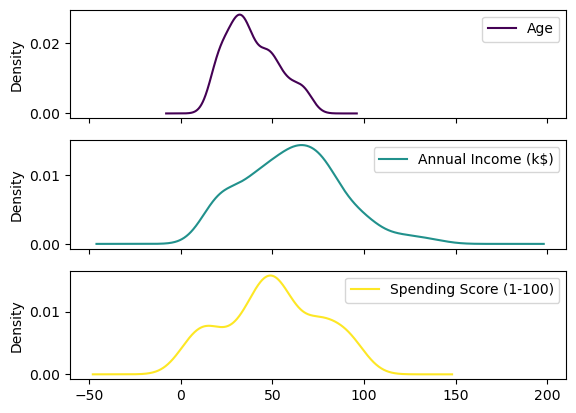

In [14]:
df[['Age','Annual Income (k$)','Spending Score (1-100)']].plot(kind='kde',subplots=True,cmap='viridis')
plt.show()

In [15]:
# in the given data, the age of the customers is high around 45
# the density of wage around 55k is the highest 
# and the spending score is high around 50 

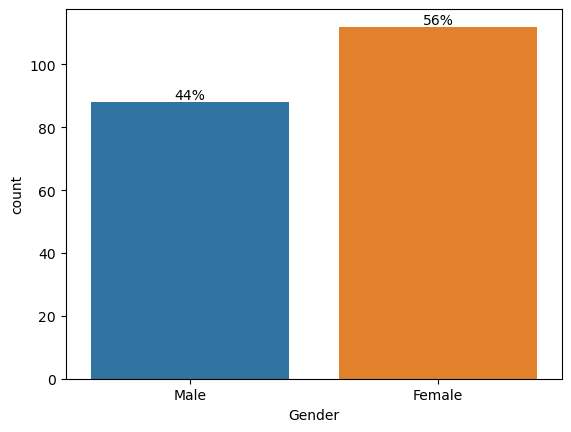

In [16]:
ax=sns.countplot(x=df['Gender'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate("{:.3g}%".format(100.*y/len(df)), (x.mean(), y), 
                 ha='center', va='bottom')
plt.show()

In [17]:
# in the data, 56% are females while 44 % percentage are males

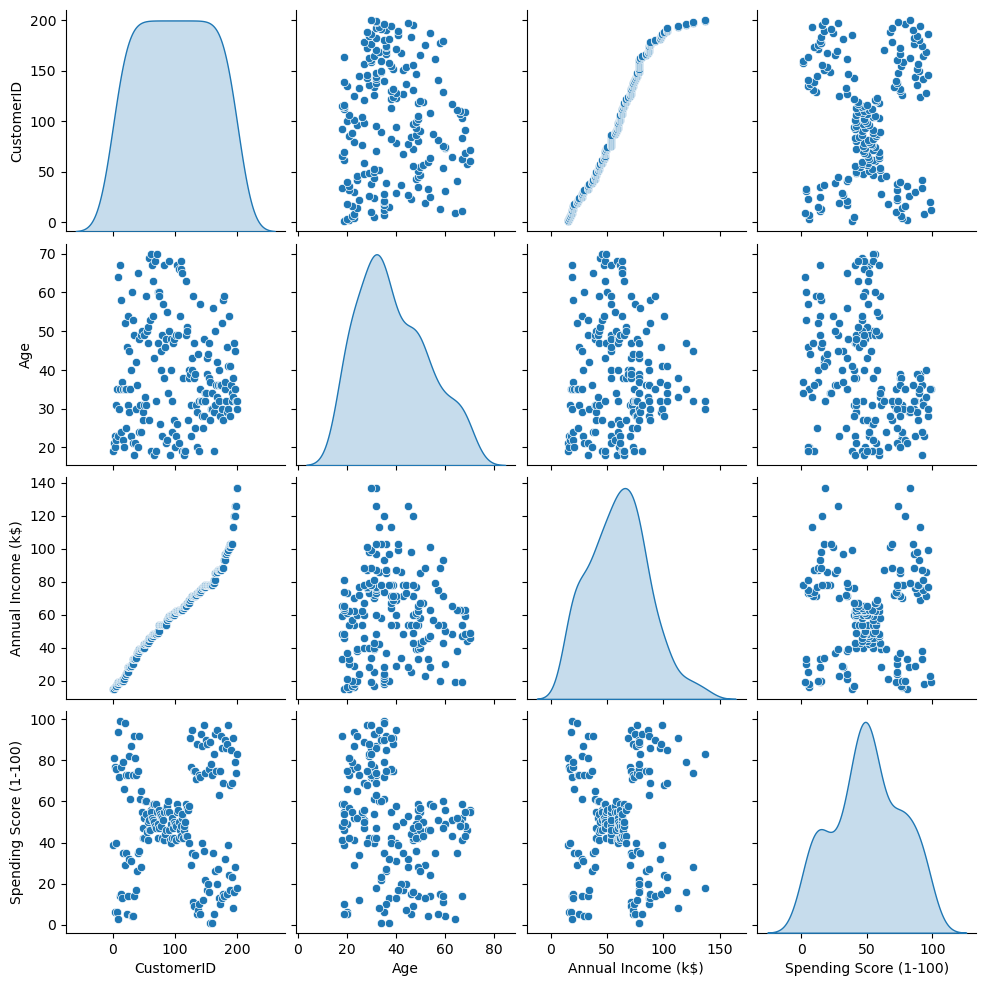

In [18]:
sns.pairplot(df, diag_kind='kde')
plt.show()

In [19]:
# from the pair plot k value can be assumed in between 
# minimum expected clusters =3 
# maximum expected clusters =18

# Scale the Data

In [20]:
# scale the data using standard scaler 
sc=StandardScaler()
scaled_df=pd.DataFrame(sc.fit_transform(df[['Age','Annual Income (k$)','Spending Score (1-100)']]), columns=['Age','Annual Income','Spending Score'])
scaled_df

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


# Deciding the value of K using elbow plot 

In [21]:
wcss=[]
for i in range(1,18):
    kMeans=KMeans(n_clusters=i)
    kMeans.fit(scaled_df)
    wcss.append(kMeans.inertia_)
print(wcss)

[600.0, 389.3861889564372, 295.2122461555489, 205.22514747675913, 168.24758017556837, 133.86833362685584, 117.01155455889813, 103.87600799022277, 92.29316537456963, 81.73863000163146, 72.68452398650258, 67.19483178357567, 63.50065532817132, 59.99813973389246, 57.564441511167544, 54.215467863496805, 51.28212758020187]


<Axes: >

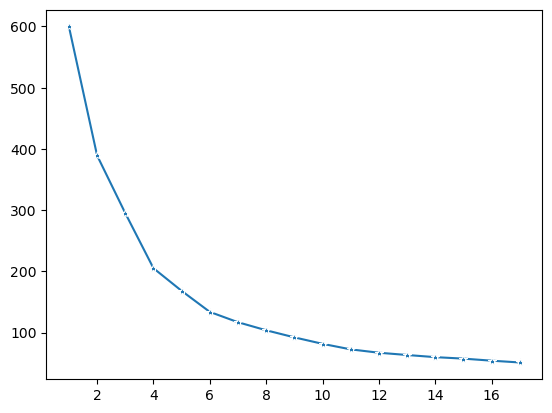

In [22]:
sns.lineplot(x=range(1,18),y=wcss,marker='*')

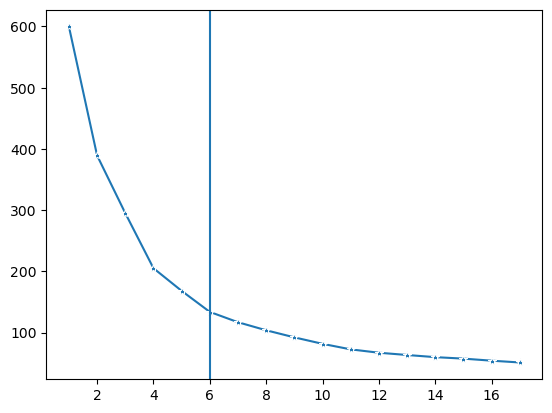

In [23]:
sns.lineplot(x=range(1,18),y=wcss,marker='*')
plt.axvline(6)

In [24]:
# model with k=5

In [25]:
KMeans_model=KMeans(n_clusters=6, n_init=5, random_state=0, verbose=1)

In [26]:
KMeans_model.fit(scaled_df)

Initialization complete
Iteration 0, inertia 210.2549444525311.
Iteration 1, inertia 180.46865175445407.
Iteration 2, inertia 174.56280336702054.
Iteration 3, inertia 168.88638416249307.
Iteration 4, inertia 161.75490707086155.
Iteration 5, inertia 154.41485371357624.
Iteration 6, inertia 150.29169929884057.
Iteration 7, inertia 150.09072018074528.
Iteration 8, inertia 149.9047479747606.
Iteration 9, inertia 149.56450461732706.
Iteration 10, inertia 149.43559889974676.
Iteration 11, inertia 149.39171491141195.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 230.51226323964272.
Iteration 1, inertia 169.63169494183182.
Iteration 2, inertia 143.2193078818721.
Iteration 3, inertia 134.52404325486617.
Iteration 4, inertia 133.88887021131026.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 199.1035557017791.
Iteration 1, inertia 150.30318871303504.
Iteration 2, inertia 147.17984372540008.
Iteration 3, iner

KMeans(n_clusters=6, n_init=5, random_state=0, verbose=1)

In [27]:
KMeans_model.inertia_

133.88887021131026

In [28]:
KMeans_model.labels_

array([5, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 3, 5, 0, 4,
       0, 5, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 1, 4, 1, 2, 1, 2, 1, 2, 1,
       4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [29]:
KMeans_model.cluster_centers_

array([[ 0.47895722, -1.30822992, -1.19644353],
       [-0.44191719,  0.99158305,  1.23950275],
       [ 0.17329545,  1.06645385, -1.2980103 ],
       [ 1.25472096, -0.24021294, -0.04399777],
       [-0.85043527, -0.14894113, -0.04147777],
       [-0.99396865, -1.34734766,  1.06404834]])

In [30]:
df['label']=KMeans_model.labels_

In [50]:
scaled_df['label']=KMeans_model.labels_

In [31]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,5
1,2,Male,21,15,81,5
2,3,Female,20,16,6,0
3,4,Female,23,16,77,5
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [51]:
scaled_df

,Age,Annual Income,Spending Score,label
0,-1.424569,-1.738999,-0.434801,5
1,-1.281035,-1.738999,1.195704,5
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,5
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,1
196,0.441365,2.497807,-0.861839,2
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,2


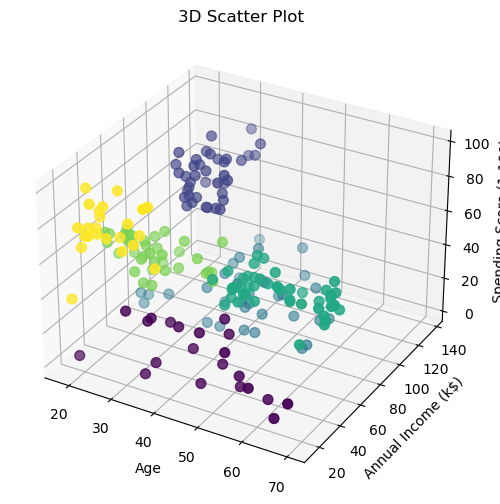

In [34]:

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['label'], cmap='viridis', s=50)

# Set labels for each axis
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')

plt.title('3D Scatter Plot')
plt.show()


# Analysing the clusters 

## Cluster zero

In [49]:
df[df['label']==0].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,21.000000,21.000000,21.000000,21.000000,21.0
mean,23.190476,45.523810,26.285714,19.380952,0.0
std,12.726425,11.766984,7.437357,12.555780,0.0
min,3.000000,20.000000,16.000000,3.000000,0.0
25%,13.000000,36.000000,20.000000,6.000000,0.0
50%,23.000000,46.000000,25.000000,15.000000,0.0
75%,33.000000,53.000000,33.000000,31.000000,0.0
max,45.000000,67.000000,39.000000,40.000000,0.0


In [53]:
scaled_df[scaled_df['label']==0].describe()

,Age,Annual Income,Spending Score,label
count,21.000000,21.000000,21.000000,21.0
mean,0.478957,-1.308230,-1.196444,0.0
std,0.844477,0.283880,0.487435,0.0
min,-1.352802,-1.700830,-1.832378,0.0
25%,-0.204535,-1.548152,-1.715913,0.0
50%,0.513132,-1.357305,-1.366519,0.0
75%,1.015499,-1.051949,-0.745374,0.0
max,2.020232,-0.822933,-0.395980,0.0


In [ ]:
# for cluster zero the average income is below the entire average income and their spending score is also low. 

## Cluster one

In [44]:
df[df['label']==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,39.000000,39.000000,39.000000,39.000000,39.0
mean,162.000000,32.692308,86.538462,82.128205,1.0
std,22.803509,3.728650,16.312485,9.364489,0.0
min,124.000000,27.000000,69.000000,63.000000,1.0
25%,143.000000,30.000000,75.500000,74.500000,1.0
50%,162.000000,32.000000,79.000000,83.000000,1.0
75%,181.000000,35.500000,95.000000,90.000000,1.0
max,200.000000,40.000000,137.000000,97.000000,1.0


In [54]:
scaled_df[scaled_df['label']==1].describe()

,Age,Annual Income,Spending Score,label
count,39.000000,39.000000,39.000000,39.0
mean,-0.441917,0.991583,1.239503,1.0
std,0.267593,0.622638,0.363544,0.0
min,-0.850435,0.322150,0.496916,1.0
25%,-0.635135,0.570251,0.943364,1.0
50%,-0.491602,0.703844,1.273347,1.0
75%,-0.240418,1.314555,1.545098,1.0
max,0.082532,2.917671,1.816849,1.0


In [ ]:
# average income above the total average income and spending is also high. good 

## Cluster two

In [45]:
df[df['label']==2].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,34.000000,34.000000,34.000000,34.000000,34.0
mean,164.529412,41.264706,88.500000,16.764706,2.0
std,21.664432,10.768385,16.533254,9.881292,0.0
min,127.000000,19.000000,71.000000,1.000000,2.0
25%,147.500000,34.500000,77.250000,10.000000,2.0
50%,166.000000,42.500000,85.500000,15.500000,2.0
75%,182.500000,47.000000,97.750000,22.750000,2.0
max,199.000000,59.000000,137.000000,39.000000,2.0


In [55]:
scaled_df[scaled_df['label']==2].describe()

,Age,Annual Income,Spending Score,label
count,34.000000,34.000000,34.000000,34.0
mean,0.173295,1.066454,-1.298010,2.0
std,0.772811,0.631065,0.383607,0.0
min,-1.424569,0.398489,-1.910021,2.0
25%,-0.312185,0.637048,-1.560627,2.0
50%,0.261948,0.951946,-1.347108,2.0
75%,0.584899,1.419521,-1.065652,2.0
max,1.446099,2.917671,-0.434801,2.0


In [ ]:
# this cluster has high average anual income but their spending score is below the entire average. 

## Cluster three

In [46]:
df[df['label']==3].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,45.000000,45.000000,45.000000,45.000000,45.0
mean,83.777778,56.333333,54.266667,49.066667,3.0
std,24.911561,8.453079,8.975725,6.300794,0.0
min,41.000000,43.000000,38.000000,35.000000,3.0
25%,64.000000,49.000000,47.000000,45.000000,3.0
50%,81.000000,54.000000,54.000000,49.000000,3.0
75%,103.000000,65.000000,62.000000,55.000000,3.0
max,161.000000,70.000000,79.000000,60.000000,3.0


In [57]:
scaled_df[scaled_df['label']==3].describe()

,Age,Annual Income,Spending Score,label
count,45.000000,45.000000,45.000000,45.0
mean,1.254721,-0.240213,-0.043998,3.0
std,0.606650,0.342598,0.244607,0.0
min,0.297832,-0.861102,-0.590088,3.0
25%,0.728432,-0.517577,-0.201872,3.0
50%,1.087265,-0.250391,-0.046586,3.0
75%,1.876699,0.054964,0.186343,3.0
max,2.235532,0.703844,0.380451,3.0


In [ ]:
# annual income average and spending score average are below the data average of both respectively. 

## Cluster four

In [47]:
df[df['label']==4].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,38.000000,38.000000,38.000000,38.000000,38.0
mean,90.052632,27.000000,56.657895,49.131579,4.0
std,26.689351,7.032742,9.905708,7.853975,0.0
min,44.000000,18.000000,39.000000,29.000000,4.0
25%,69.250000,21.000000,48.000000,42.000000,4.0
50%,93.000000,26.500000,59.500000,50.000000,4.0
75%,112.750000,31.750000,63.750000,55.000000,4.0
max,143.000000,40.000000,76.000000,61.000000,4.0


In [58]:
scaled_df[scaled_df['label']==4].describe()

,Age,Annual Income,Spending Score,label
count,38.000000,38.000000,38.000000,38.0
mean,-0.850435,-0.148941,-0.041478,4.0
std,0.504717,0.378095,0.304904,0.0
min,-1.496335,-0.822933,-0.823017,4.0
25%,-1.281035,-0.479408,-0.318337,4.0
50%,-0.886319,-0.040460,-0.007764,4.0
75%,-0.509543,0.121760,0.186343,4.0
max,0.082532,0.589336,0.419273,4.0


In [ ]:
# low average annual income and low spending score 

## Cluster five

In [48]:
df[df['label']==5].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,23.000000,23.000000,23.000000,23.000000,23.0
mean,22.130435,25.000000,25.260870,77.608696,5.0
std,13.645860,5.300086,7.723738,13.272457,0.0
min,1.000000,18.000000,15.000000,39.000000,5.0
25%,11.000000,21.000000,19.000000,73.000000,5.0
50%,22.000000,23.000000,24.000000,77.000000,5.0
75%,33.000000,29.500000,31.500000,84.500000,5.0
max,46.000000,35.000000,39.000000,99.000000,5.0


In [59]:
scaled_df[scaled_df['label']==5].describe()

,Age,Annual Income,Spending Score,label
count,23.000000,23.000000,23.000000,23.0
mean,-0.993969,-1.347348,1.064048,5.0
std,0.380370,0.294811,0.515257,0.0
min,-1.496335,-1.738999,-0.434801,5.0
25%,-1.281035,-1.586321,0.885132,5.0
50%,-1.137502,-1.395474,1.040418,5.0
75%,-0.671019,-1.109204,1.331580,5.0
max,-0.276302,-0.822933,1.894492,5.0


In [ ]:
# eventhough low income this group like to spend more. 

## Inferences from the cluster 

1. group 1 - annual income and spending score is high, with some offers they may spend more.

2. group 2 - Cluster two must be the focus group as they have high income and low annual spending score from the business point of view. More data must be collected regarding this cluster and can be analysed to make efficient strategies to make them spend more. 

3. group 3 - low income and low expendiure -- offers could work. Has to analyse further for better conclusions. 

4. group 4 - low income and low expendiure -- offers could work. has to analyse further. Has to analyse further for better conclusions. 

5. GROUP 5 -# eventhough low income this group like to spend more. Any way with or without attractive features these group will spend more. 


further analysis can be done on bigger datasets of each clusters to study about the spending analysis and to draw strategies for the business. 

#### thank you 